In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import preprocessing

In [22]:
# Load data
df = pd.read_pickle("rawFeaturesGTZAN.pkl")

# Split into train and test
data = df.drop(["path", "class"], axis=1)

X = data.to_numpy()
y = df["class"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

# Get validation set to test parameters for traditional methods on it
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, shuffle=True, stratify=y_train)

In [23]:
gaussScaler = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)
X_train = gaussScaler.transform(X_train)
X_val = gaussScaler.transform(X_val)

In [24]:
def getMetrics(y_pred, y_test):
    acc = accuracy_score(y_pred, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return [acc, precision, recall, f1]

kNN

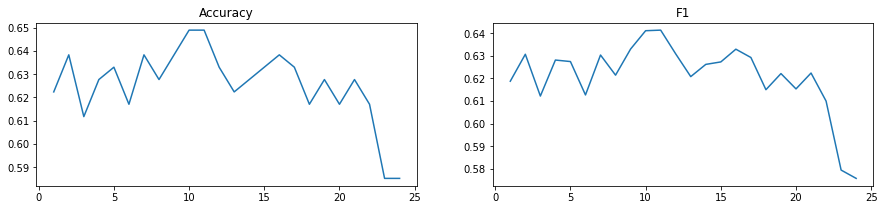

Best k for acc: 10.0 , Best k for F1: 11.0


In [25]:
# Best n for k-NN
def evalKnn(X_train, X_test, y_train, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["k","acc","precision","recall","f1"])
for k in range(1,25):
    y_predCurr = evalKnn(X_train, X_val, y_train, k=k)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [k]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["k"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["k"], results["f1"])
plt.show()

print(f"Best k for acc: {results.iloc[results['acc'].idxmax()]['k']} , Best k for F1: {results.iloc[results['f1'].idxmax()]['k']}")


Random Forest

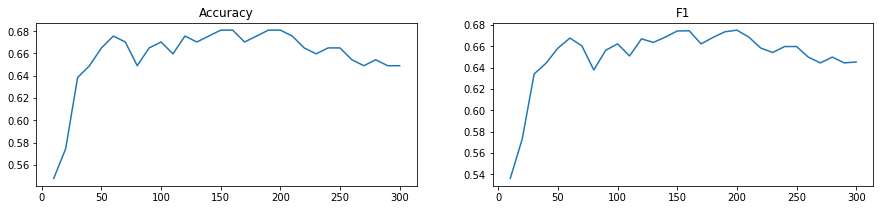

Best n for acc: 150.0 , Best n for F1: 200.0


In [26]:
# Best number of trees in random forest
def evalRandomForest(X_train, X_test, y_train, n=100):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    model = rf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["n","acc","precision","recall","f1"])
for n in range(10,301,10):
    y_predCurr = evalRandomForest(X_train, X_val, y_train, n=n)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [n]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["n"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["n"], results["f1"])
plt.show()

print(f"Best n for acc: {results.iloc[results['acc'].idxmax()]['n']} , Best n for F1: {results.iloc[results['f1'].idxmax()]['n']}")

SVM

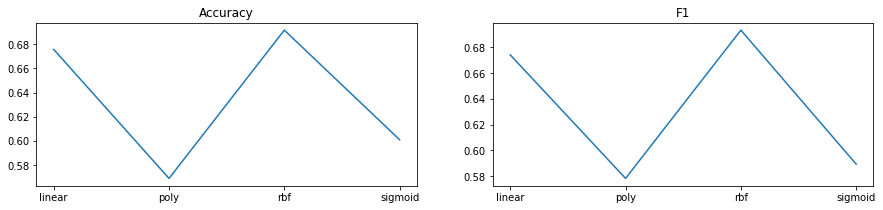

Best kernel for acc: rbf , Best kernel for F1: rbf


In [27]:
def evalSVM(X_train, X_test, y_train, kernel="linear"):
    svm = SVC(kernel=kernel, random_state=42)
    model = svm.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["kernel","acc","precision","recall","f1"])
kernels = ["linear","poly", "rbf", "sigmoid"]
for ker in kernels:
    y_predCurr = evalSVM(X_train, X_val, y_train, kernel=ker)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [ker]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(range(len(kernels)), results["acc"])
plt.xticks(range(len(kernels)), labels=kernels)
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(range(len(kernels)), results["f1"])
plt.xticks(range(len(kernels)), labels=kernels)
plt.show()

print(f"Best kernel for acc: {results.iloc[results['acc'].idxmax()]['kernel']} , Best kernel for F1: {results.iloc[results['f1'].idxmax()]['kernel']}")

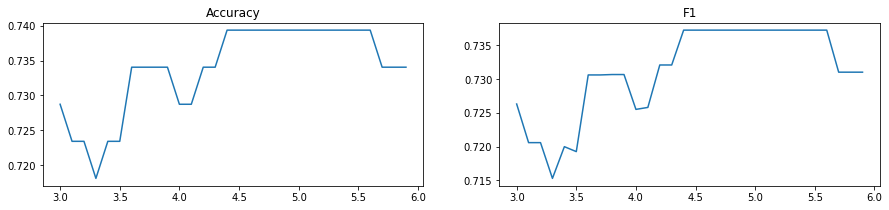

Best c for acc: 4.400000000000001 , Best c for F1: 4.400000000000001


In [28]:
def evalSVM(X_train, X_test, y_train, kernel="rbf", c=1):
    svm = SVC(C=c, kernel=kernel, random_state=42)
    model = svm.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["c","acc","precision","recall","f1"])
for c in np.arange(3,6,0.1):
    y_predCurr = evalSVM(X_train, X_val, y_train, c=c)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [c]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["c"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["c"], results["f1"])
plt.show()

print(f"Best c for acc: {results.iloc[results['acc'].idxmax()]['c']} , Best c for F1: {results.iloc[results['f1'].idxmax()]['c']}")

Gradient Boosting

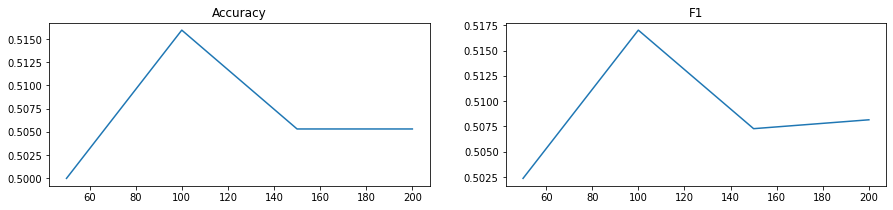

Best n for acc: 100.0 , Best n for F1: 100.0


In [35]:
def evalGB(X_train, X_test, y_train, n=100):
    xgb = GradientBoostingClassifier(n_estimators=n, learning_rate=1.0, max_depth=1, random_state=42)
    model = xgb.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

losses = ["deviance", "exponential"]
results = pd.DataFrame(columns=["n","acc","precision","recall","f1"])
for n in range(50,201,50):
    y_predCurr = evalGB(X_train, X_val, y_train, n=n)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [n]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["n"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["n"], results["f1"])
plt.show()

print(f"Best n for acc: {results.iloc[results['acc'].idxmax()]['n']} , Best n for F1: {results.iloc[results['f1'].idxmax()]['n']}")

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A

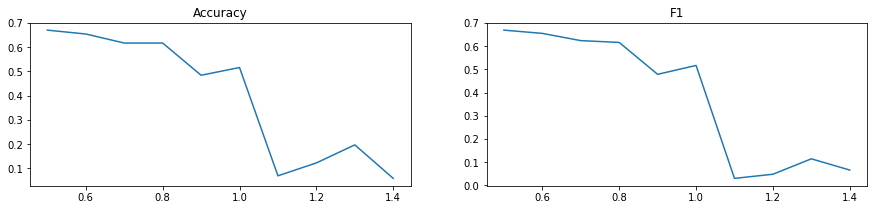

Best rate for acc: 0.5 , Best rate for F1: 0.5


In [37]:
def evalGB(X_train, X_test, y_train, n=100, rate=1.0):
    xgb = GradientBoostingClassifier(n_estimators=n, learning_rate=rate, max_depth=1, random_state=42)
    model = xgb.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["rate","acc","precision","recall","f1"])
for r in np.arange(0.5,1.5,0.1):
    y_predCurr = evalGB(X_train, X_val, y_train, rate=r)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [r]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["rate"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["rate"], results["f1"])
plt.show()

print(f"Best rate for acc: {results.iloc[results['acc'].idxmax()]['rate']} , Best rate for F1: {results.iloc[results['f1'].idxmax()]['rate']}")

Multilayer Perceptron

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

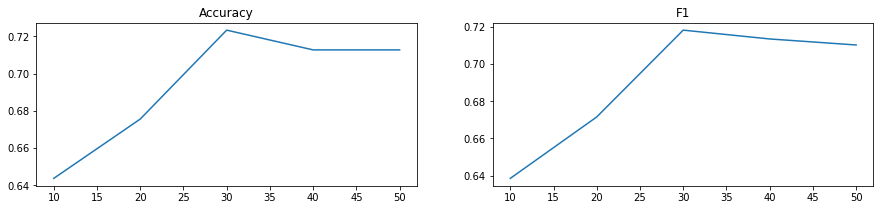

Best size for acc: 30.0 , Best size for F1: 30.0


In [47]:
def evalPerceptron(X_train, X_test, y_train, hLayerSize=10):
    mp = MLPClassifier(hidden_layer_sizes=(hLayerSize), random_state=42)
    model = mp.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["size","acc","precision","recall","f1"])
for size in range(10,51,10):
    y_predCurr = evalPerceptron(X_train, X_val, y_train, hLayerSize=size)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [size]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["size"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["size"], results["f1"])
plt.show()

print(f"Best size for acc: {results.iloc[results['acc'].idxmax()]['size']} , Best size for F1: {results.iloc[results['f1'].idxmax()]['size']}")

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization

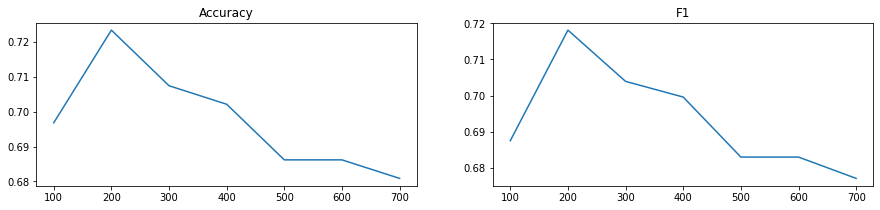

Best iter for acc: 200.0 , Best iter for F1: 200.0


In [51]:
def evalPerceptron(X_train, X_test, y_train, hLayerSize=30, numIter=200):
    mp = MLPClassifier(hidden_layer_sizes=(hLayerSize), max_iter=numIter, random_state=42)
    model = mp.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

results = pd.DataFrame(columns=["iter","acc","precision","recall","f1"])
for numIter in range(100,701,100):
    y_predCurr = evalPerceptron(X_train, X_val, y_train, numIter=numIter)
    metricsCurr = getMetrics(y_predCurr, y_val)
    newRow = [numIter]+metricsCurr
    results.loc[len(results)] = newRow

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(results["iter"], results["acc"])
plt.subplot(1,2,2)
plt.title("F1")
plt.plot(results["iter"], results["f1"])
plt.show()

print(f"Best iter for acc: {results.iloc[results['acc'].idxmax()]['iter']} , Best iter for F1: {results.iloc[results['f1'].idxmax()]['iter']}")